# Flat Clustering
---

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
pd.options.display.float_format = '{:,.2f}'.format

In [19]:
import os
import pickle
from pprint import pprint
from os.path import join as JP
from collections import defaultdict

from utils.nlp_utils import preproces
from utils.general import parse_yaml, ensure_directories

from scripts.catalog import (
    Catalog, Document, Corpus,
    load_catalog, load_corpus)

config = parse_yaml('config.yaml')
paths = config['paths']
ensure_directories(paths)

In [3]:
catalog = Catalog()

## Load Catalog

In [4]:
catalog = load_catalog(path=paths['catalog'], name='spacy_pipeline_on_US_corpus')
# catalog.documents[0].sp_doc

In [5]:
print(len(catalog.documents))

15


## TFIDF

### Collect the Corpus for Sklearn

In [6]:
corpus = catalog.collect_corpus(attr='processed_text', form=list)
document = corpus[0]
document[:500]

'application publish asahi glas method produce carbamate compound carbamate compound method produce isocyanate compound present invention relate method produce carbamate compound comprise react fluorine contain carbonic diester compound represent formula aromatic diamine compound represent formula catalyst produce carbamate compound represent formula method produce isocyanate compound represent formula carbamate compound catalyst represent fluorine contain represent divalent divalent divalent aro'

In [7]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
# TODO: Increase all these
EMBED_SIZE = 10000        
NUM_CLUSTERS = 4
WORDS_PER_CLUSTER = 50

In [9]:
vectorizer = TfidfVectorizer(
    min_df=.1,
    max_df=.7,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    max_features=EMBED_SIZE,
    ngram_range=(1,3),
    lowercase=True,
    stop_words=stopwords.words('english'))

In [10]:
tfidf = catalog.to_matrix(
    vectorizer=vectorizer,
    modelname='TFIDF',
    max_docs=None)
print(tfidf.representation.shape)
tfidf.representation.head()

(15, 9936)


,0000,0000 process,0000 process produce,0011,0015,0018,0021,0023,0028,0031,...,yield loss,yield low,yield method,yield mol,yield reaction,zeolite,zeolite diatomaceous,zeolite diatomaceous earth,zinc,zirconium
0,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Clustering

In [11]:
from scripts.algorithms.clustering import kmeans_clustering

from scripts.algorithms.clustering import (
    filter_cluster)

from scripts.algorithms.clustering import (
    compute_word_importance_for_centroid,
    compute_word_importance_using_documents)

from scripts.algorithms.clustering import (
    plot_centroids_as_wordclouds,
    plot_clusters_as_wordclouds,
    plot_subsampled_clusters_as_wordclouds)

In [12]:
clusters, cluster_words = kmeans_clustering(
    model=tfidf,
    num_clusters=NUM_CLUSTERS,
    words_per_cluster=WORDS_PER_CLUSTER)

## Visualization

### Using Centroids

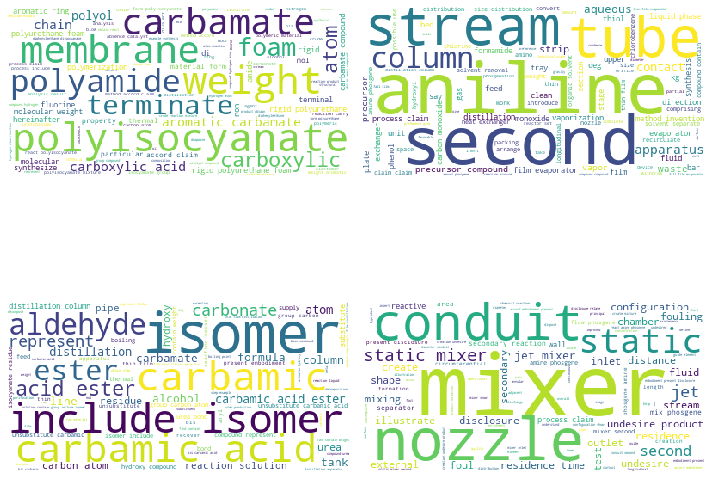

In [13]:
plot_centroids_as_wordclouds(tfidf,clusters)

### Using Subsampled TFIDF

[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster
[INFO]: Computing word importance for each cluster


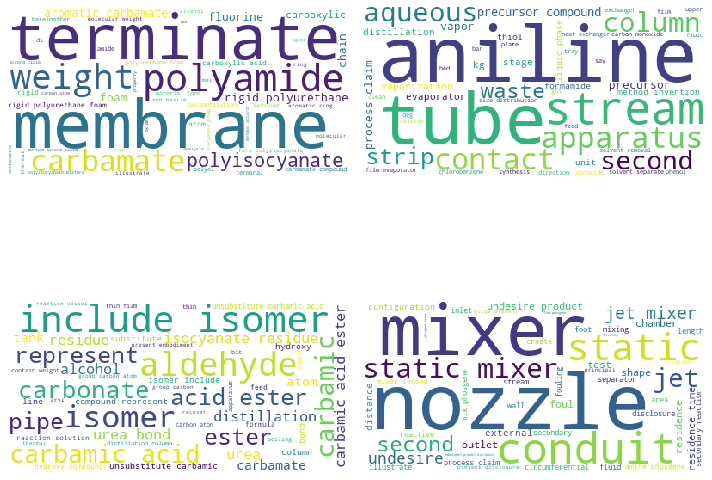

In [16]:
plot_subsampled_clusters_as_wordclouds(tfidf, clusters, cluster_words, method='idf')

### Using All Corpus

[INFO]: Computing word importance for each cluster
(49, 5)
Index(['word', 'idf', 'max_tf_idf', 'avg_tf_idf', 'norm_tf_idf'], dtype='object')
        word  idf  max_tf_idf  avg_tf_idf  norm_tf_idf
0  carbamate 1.83        0.29        0.06         0.46
1   fluorine 2.67        0.31        0.02         0.31
2      agent 1.83        0.10        0.01         0.11
3       ring 1.58        0.13        0.02         0.15
4    thermal 1.47        0.14        0.03         0.19
[INFO]: Computing word importance for each cluster
(49, 5)
Index(['word', 'idf', 'max_tf_idf', 'avg_tf_idf', 'norm_tf_idf'], dtype='object')
           word  idf  max_tf_idf  avg_tf_idf  norm_tf_idf
0          unit 1.83        0.14        0.01         0.14
1  distillation 1.47        0.20        0.05         0.32
2     apparatus 1.58        0.43        0.05         0.45
3           gas 1.37        0.12        0.02         0.15
4     synthesis 1.47        0.07        0.02         0.12
[INFO]: Computing word importance for ea

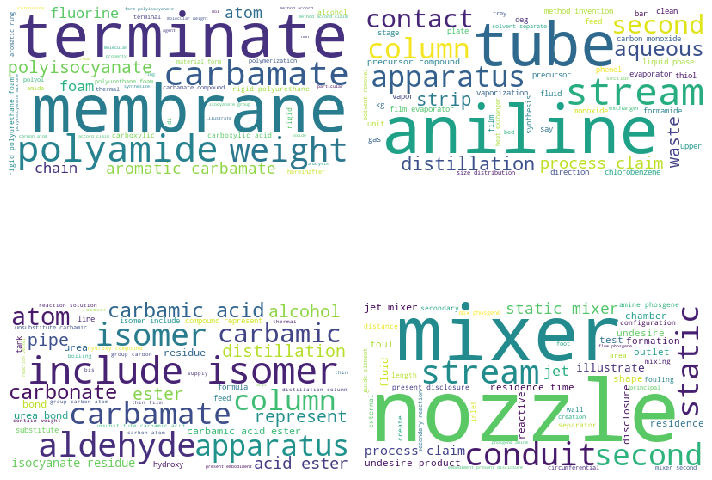

In [17]:
plot_clusters_as_wordclouds(tfidf,cluster_words,method='idf')